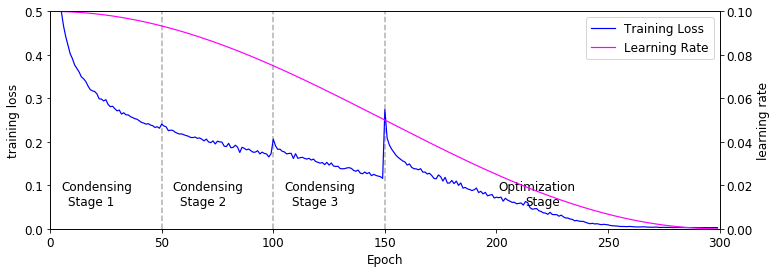

In [10]:
%matplotlib inline
import numpy as np
import os
import os.path

import matplotlib
# matplotlib.use('Agg')
from matplotlib import rcParams
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'sans-serif'

prefix1 = '/home/gh349/denseNet/playground/pyCondensedNet/results/'

folders = [
    'condensenet_216506_28641834.txt'
#     prefix1+'cifar10_0831/final_full/compactnet_learn_nT_full_628930_176655450.txt', 'Full model',
#     prefix1+'cifar10_0831/final_group/compactnet_learn_nT_group_240130_76201050.txt', 'Group convolution',
#     prefix1+'cifar10_0831/final_normal/compactnet_learn_nT_240130_76201050.txt', 'Training Loss',
#     prefix1+'cifar10_0831/final_50/compactnet_learn_nT_240130_76201050.txt', 'prune_50%',
#     prefix1+'cifar10_0831/final_lasso_0.0001/compactnet_learn_nT_240130_76201050.txt', 'lasso_0.0001',
# #     prefix1+'cifar10_0831/final_lasso_0.00005/compactnet_learn_nT_240130_76201050.txt', 'lasso_0.00005',
# #     prefix1+'cifar10_0831/final_lasso_0.00001/compactnet_learn_nT_240130_76201050.txt', 'lasso_0.00001',
#     prefix1+'cifar10_0831/final_lasso_0.000005/compactnet_learn_nT_240130_76201050.txt', 'lasso_0.000005',
#     prefix1+'cifar10_0831/final_lasso_0.000001/compactnet_learn_nT_240130_76201050.txt', 'lasso_0.000001',
]

yrange = [4,6]
    
fig = plt.figure() 

fig, ax1 = plt.subplots(figsize=(12, 4))

params = []
flops = []

# for n in range(0, len(folders)//2):
# #     print(folders[2*n])

path = 'condensenet52/condensenet_216506_28641834.txt'
file = np.loadtxt(path)
params.append(int(path.split('_')[-2].split('.')[0]))
flops.append(int(path.split('_')[-1].split('.')[0]))

train_err = file[:, 2]
val_err = file[:, 0]
train_loss = file[:, -2]

ax1.plot(np.arange(train_err.shape[0]), train_loss, '-', c='b', linewidth=1.2, label='Training Loss')
plt.ylabel('training loss')
plt.xlabel('Epoch')

plt.ylim([0., 0.5])
plt.xlim([0, 300])
#     plt.grid(True)

plt.ticklabel_format(style='plain', axis='x', scilimits=(0,0))
ax1.set_xticks([50, 100, 150], minor=True)
ax1.xaxis.grid(True, which='minor', linestyle='--', linewidth=1.5)
    

################################################################
    
    
ax2 = ax1.twinx()

lr_x = np.arange(300)
# lr = 0.5 * args.lr * (1 + math.cos(math.pi * T_cur / T_total))
lr_y = 0.5 * 0.1 * (1 + np.cos(np.pi * lr_x / 300))

color = 'magenta'
ax2.plot(lr_x, lr_y, '-', linewidth=1.2, c=color)
ax1.plot(np.nan, '-', linewidth=1.2, c=color, label='Learning Rate')
plt.ylabel('learning rate')
# plt.xlabel('Epoch')

ax1.legend(loc=1)
plt.ylim([0, 0.1])
plt.xlim([0, 300])

plt.ticklabel_format(style='plain', axis='x', scilimits=(0,0))
ax2.set_xticks([50, 100, 150], minor=True)
ax2.xaxis.grid(True, which='minor', linestyle='--', linewidth=1.5)

def add_text(x, s, ax):
    ss = "Condensing"
    ax.text(x-len(ss)*2.0, .09, ss)
    ss = s
    ax.text(x-len(ss)*2.4, .055, ss)
def add_text_1(x, s, ax):
    ss = "Optimization"
    ax.text(x-len(ss)*2.0, .09, ss)
    ss = s
    ax.text(x-len(ss)*2.4, .055, ss)

add_text(25, "Stage 1", ax1)
add_text(75, "Stage 2", ax1)
add_text(125, "Stage 3", ax1)
add_text_1(225, "Stage", ax1)

fig.savefig('curve/learning_curve_condensenet52.pdf', bbox_inches='tight', format='pdf')

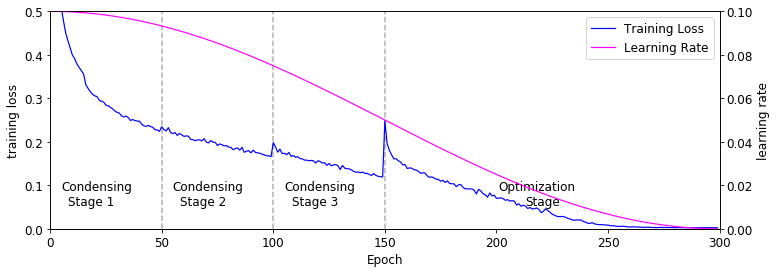

In [12]:
%matplotlib inline
import numpy as np
import os
import os.path

import matplotlib
# matplotlib.use('Agg')
from matplotlib import rcParams
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'sans-serif'

prefix1 = '/home/gh349/denseNet/playground/pyCondensedNet/results/'

folders = [
    'condensenet_216506_28641834.txt'
#     prefix1+'cifar10_0831/final_full/compactnet_learn_nT_full_628930_176655450.txt', 'Full model',
#     prefix1+'cifar10_0831/final_group/compactnet_learn_nT_group_240130_76201050.txt', 'Group convolution',
#     prefix1+'cifar10_0831/final_normal/compactnet_learn_nT_240130_76201050.txt', 'Training Loss',
#     prefix1+'cifar10_0831/final_50/compactnet_learn_nT_240130_76201050.txt', 'prune_50%',
#     prefix1+'cifar10_0831/final_lasso_0.0001/compactnet_learn_nT_240130_76201050.txt', 'lasso_0.0001',
# #     prefix1+'cifar10_0831/final_lasso_0.00005/compactnet_learn_nT_240130_76201050.txt', 'lasso_0.00005',
# #     prefix1+'cifar10_0831/final_lasso_0.00001/compactnet_learn_nT_240130_76201050.txt', 'lasso_0.00001',
#     prefix1+'cifar10_0831/final_lasso_0.000005/compactnet_learn_nT_240130_76201050.txt', 'lasso_0.000005',
#     prefix1+'cifar10_0831/final_lasso_0.000001/compactnet_learn_nT_240130_76201050.txt', 'lasso_0.000001',
]

yrange = [4,6]
    
fig = plt.figure() 

fig, ax1 = plt.subplots(figsize=(12, 4))

params = []
flops = []

# for n in range(0, len(folders)//2):
# #     print(folders[2*n])

path = 'condenserestrans52/condenserestrans_242938_31902250.txt'
file = np.loadtxt(path)
params.append(int(path.split('_')[-2].split('.')[0]))
flops.append(int(path.split('_')[-1].split('.')[0]))

train_err = file[:, 2]
val_err = file[:, 0]
train_loss = file[:, -2]

ax1.plot(np.arange(train_err.shape[0]), train_loss, '-', c='b', linewidth=1.2, label='Training Loss')
plt.ylabel('training loss')
plt.xlabel('Epoch')

plt.ylim([0., 0.5])
plt.xlim([0, 300])
#     plt.grid(True)

plt.ticklabel_format(style='plain', axis='x', scilimits=(0,0))
ax1.set_xticks([50, 100, 150], minor=True)
ax1.xaxis.grid(True, which='minor', linestyle='--', linewidth=1.5)
    

################################################################
    
    
ax2 = ax1.twinx()

lr_x = np.arange(300)
# lr = 0.5 * args.lr * (1 + math.cos(math.pi * T_cur / T_total))
lr_y = 0.5 * 0.1 * (1 + np.cos(np.pi * lr_x / 300))

color = 'magenta'
ax2.plot(lr_x, lr_y, '-', linewidth=1.2, c=color)
ax1.plot(np.nan, '-', linewidth=1.2, c=color, label='Learning Rate')
plt.ylabel('learning rate')
# plt.xlabel('Epoch')

ax1.legend(loc=1)
plt.ylim([0, 0.1])
plt.xlim([0, 300])

plt.ticklabel_format(style='plain', axis='x', scilimits=(0,0))
ax2.set_xticks([50, 100, 150], minor=True)
ax2.xaxis.grid(True, which='minor', linestyle='--', linewidth=1.5)

def add_text(x, s, ax):
    ss = "Condensing"
    ax.text(x-len(ss)*2.0, .09, ss)
    ss = s
    ax.text(x-len(ss)*2.4, .055, ss)
def add_text_1(x, s, ax):
    ss = "Optimization"
    ax.text(x-len(ss)*2.0, .09, ss)
    ss = s
    ax.text(x-len(ss)*2.4, .055, ss)

add_text(25, "Stage 1", ax1)
add_text(75, "Stage 2", ax1)
add_text(125, "Stage 3", ax1)
add_text_1(225, "Stage", ax1)

fig.savefig('curve/learning_curve_condenserestrans52.pdf', bbox_inches='tight', format='pdf')

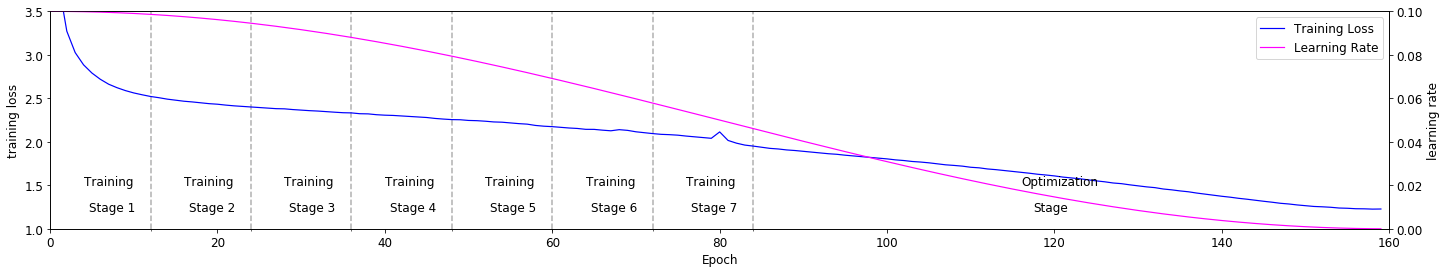

In [63]:

%matplotlib inline
import numpy as np
import os
import os.path

import matplotlib
# matplotlib.use('Agg')
from matplotlib import rcParams
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'sans-serif'

prefix1 = '/home/gh349/denseNet/playground/pyCondensedNet/results/'

folders = [
    'condensenet_216506_28641834.txt'
#     prefix1+'cifar10_0831/final_full/compactnet_learn_nT_full_628930_176655450.txt', 'Full model',
#     prefix1+'cifar10_0831/final_group/compactnet_learn_nT_group_240130_76201050.txt', 'Group convolution',
#     prefix1+'cifar10_0831/final_normal/compactnet_learn_nT_240130_76201050.txt', 'Training Loss',
#     prefix1+'cifar10_0831/final_50/compactnet_learn_nT_240130_76201050.txt', 'prune_50%',
#     prefix1+'cifar10_0831/final_lasso_0.0001/compactnet_learn_nT_240130_76201050.txt', 'lasso_0.0001',
# #     prefix1+'cifar10_0831/final_lasso_0.00005/compactnet_learn_nT_240130_76201050.txt', 'lasso_0.00005',
# #     prefix1+'cifar10_0831/final_lasso_0.00001/compactnet_learn_nT_240130_76201050.txt', 'lasso_0.00001',
#     prefix1+'cifar10_0831/final_lasso_0.000005/compactnet_learn_nT_240130_76201050.txt', 'lasso_0.000005',
#     prefix1+'cifar10_0831/final_lasso_0.000001/compactnet_learn_nT_240130_76201050.txt', 'lasso_0.000001',
]

yrange = [4,6]
    
fig = plt.figure() 

fig, ax1 = plt.subplots(figsize=(24, 4))

params = []
flops = []

# for n in range(0, len(folders)//2):
# #     print(folders[2*n])

path = 'condenserestrans_4226376_307603912.txt'
file = np.loadtxt(path)
params.append(int(path.split('_')[-2].split('.')[0]))
flops.append(int(path.split('_')[-1].split('.')[0]))

train_err = file[:, 2]
val_err = file[:, 0]
train_loss = file[:, -2]

ax1.plot(np.arange(train_err.shape[0]), train_loss, '-', c='b', linewidth=1.2, label='Training Loss')
plt.ylabel('training loss')
plt.xlabel('Epoch')

plt.ylim([1., 3.5])
plt.xlim([0, 160])
#     plt.grid(True)

plt.ticklabel_format(style='plain', axis='x', scilimits=(0,0))
ax1.set_xticks([12, 24, 36, 48, 60, 72, 84], minor=True)
ax1.xaxis.grid(True, which='minor', linestyle='--', linewidth=1.5)
    

################################################################
    
    
ax2 = ax1.twinx()

lr_x = np.arange(160)
# lr = 0.5 * args.lr * (1 + math.cos(math.pi * T_cur / T_total))
lr_y = 0.5 * 0.1 * (1 + np.cos(np.pi * lr_x / 160))

color = 'magenta'
ax2.plot(lr_x, lr_y, '-', linewidth=1.2, c=color)
ax1.plot(np.nan, '-', linewidth=1.2, c=color, label='Learning Rate')
plt.ylabel('learning rate')
# plt.xlabel('Epoch')

ax1.legend(loc=1)
plt.ylim([0, 0.1])
plt.xlim([0, 160])

plt.ticklabel_format(style='plain', axis='x', scilimits=(0,0))
ax2.set_xticks([12, 24, 36, 48, 60, 72, 84], minor=True)
ax2.xaxis.grid(True, which='minor', linestyle='--', linewidth=1.5)

def add_text(x, s, ax):
    ss = "Training"
    ax.text(x-len(ss)*2.0, 1.5, ss)
    ss = s
    ax.text(x-len(ss)*2.2, 1.2, ss)
def add_text_1(x, s, ax):
    ss = "Optimization"
    ax.text(x-len(ss)*2.0, 1.5, ss)
    ss = s
    ax.text(x-len(ss)*4.5, 1.2, ss)
add_text(18+2, "Stage 1", ax1)
add_text(28+4, "Stage 2", ax1)
add_text(38+6, "Stage 3", ax1)
add_text(48+8, "Stage 4", ax1)
add_text(58+10, "Stage 5", ax1)
add_text(68+12, "Stage 6", ax1)
add_text(78+14, "Stage 7", ax1)

add_text_1(140, "Stage", ax1)

fig.savefig('curve/learning_curve_condenserestrans.pdf', bbox_inches='tight', format='pdf')